In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In this workspace, you'll perform some polishing and cleanup of a plot created using the Pokémon creature dataset.

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task**: Perform polishing and cleaning steps for the following multivariate plot, where the relationship between height and weight are depicted for the Fairy and Dragon Pokémon types. You'll need to do more than just add meaningful labels and titles to the plot. Pay attention to the interpretability of tick marks and the ability to associate each point to a type of Pokemon.

For reference, height is in terms of meters and weight is in terms of kilograms. One other thing you might try is to change the colors mapped to each type to match those given by the game series. Fairy is depicted with a light pink (hex code #ee99ac) while Dragon is associated with a medium purple (hex code #7038f8). (Type colors taken from [Pokémon Wiki Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates).)

In [5]:
# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

In [6]:
# MODIFY THIS CODE
g = sb.FacetGrid(data = pokemon_sub, hue = 'type',size = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

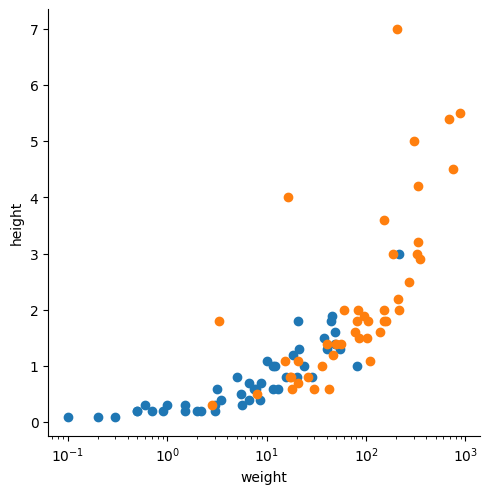

In [20]:
# After modifie the code
g = sb.FacetGrid(data = pokemon_sub, hue = 'type',height = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')

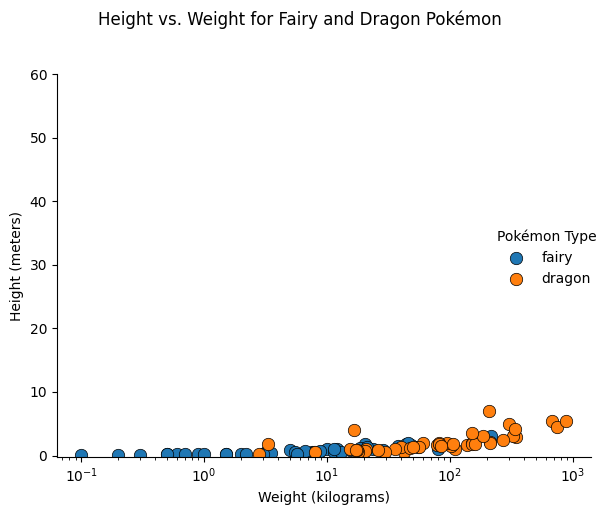

In [21]:
#another solution 
g = sb.FacetGrid(data=pokemon_sub, hue='type', height=5)
g.map(plt.scatter, 'weight', 'height', s=80, edgecolor='k', linewidth=0.5)
g.set(xscale='log')
g.set_axis_labels('Weight (kilograms)', 'Height (meters)')
g.fig.suptitle('Height vs. Weight for Fairy and Dragon Pokémon', y=1.02)
g.set(xticks=[0.1, 1, 10, 100, 1000], yticks=[0, 10, 20, 30, 40, 50, 60])
g.add_legend(title='Pokémon Type',loc = 'center right')
plt.tight_layout()
plt.show()
